# Item 1: Customer Segmentation

## Introduction

The E-commerce customer dataset contains information about customers' purchasing behavior. This analysis aims to segment customers based on their purchasing behavior using K-means clustering. The goal is to provide insights that can help in developing strategies for targeted marketing.

## Objectives

- Perform K-means clustering to segment customers
- Visualize customer segments
- Provide insights on each customer segment


# Item 2: Data Loading and Overview

In [1]:
import pandas as pd

# Load the dataset
data_path = '../data/Mall_Customers.csv'
customer_df = pd.read_csv(data_path)

# Display the first few rows of the dataset
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Display the last few rows of the dataset
customer_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Dataset Overview

The Mall Customers dataset is composed of 5 features and 199 observations that contains information about customers' purchasing behavior at a mall. The data includes various attributes that describe each customer's demographic and spending habits. This dataset is useful for performing customer segmentation to identify different customer groups based on their purchasing behavior.

#### Attributes:

- **CustomerID**: A unique identifier for each customer.
- **Gender**: The gender of the customer (Male/Female).
- **Age**: The age of the customer.
- **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: A score assigned by the mall based on the customer's spending behavior and loyalty (1 being lowest, 100 being highest).

#### Sample Data Points:

1. **CustomerID: 1**
   - **Gender**: Male
   - **Age**: 19
   - **Annual Income (k$)**: 15
   - **Spending Score (1-100)**: 39

2. **CustomerID: 2**
   - **Gender**: Male
   - **Age**: 21
   - **Annual Income (k$)**: 15
   - **Spending Score (1-100)**: 81

3. **CustomerID: 3**
   - **Gender**: Female
   - **Age**: 20
   - **Annual Income (k$)**: 16
   - **Spending Score (1-100)**: 6

4. **CustomerID: 4**
   - **Gender**: Female
   - **Age**: 23
   - **Annual Income (k$)**: 16
   - **Spending Score (1-100)**: 77

5. **CustomerID: 5**
   - **Gender**: Female
   - **Age**: 31
   - **Annual Income (k$)**: 17
   - **Spending Score (1-100)**: 40

196. **CustomerID: 196**
   - **Gender**: Female
   - **Age**: 35
   - **Annual Income (k$)**: 120
   - **Spending Score (1-100)**: 79

197. **CustomerID: 197**
   - **Gender**: Female
   - **Age**: 45
   - **Annual Income (k$)**: 126
   - **Spending Score (1-100)**: 28

198. **CustomerID: 198**
   - **Gender**: Male
   - **Age**: 32
   - **Annual Income (k$)**: 126
   - **Spending Score (1-100)**: 74

199. **CustomerID: 199**
   - **Gender**: Male
   - **Age**: 32
   - **Annual Income (k$)**: 137
   - **Spending Score (1-100)**: 18

200. **CustomerID: 200**
   - **Gender**: Male
   - **Age**: 30
   - **Annual Income (k$)**: 137
   - **Spending Score (1-100)**: 83

This dataset provides a comprehensive view of customer demographics and spending behavior, making it ideal for segmentation analysis to develop targeted marketing strategies.


# Item 3: Data Preprocessing

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.26472

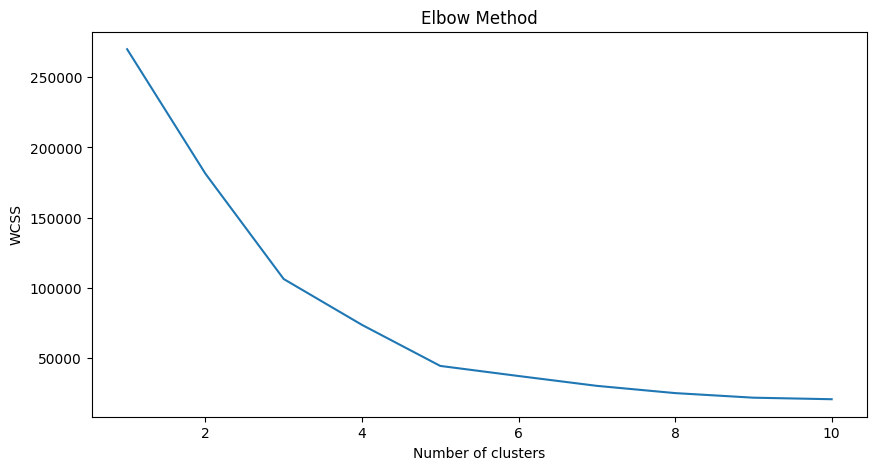

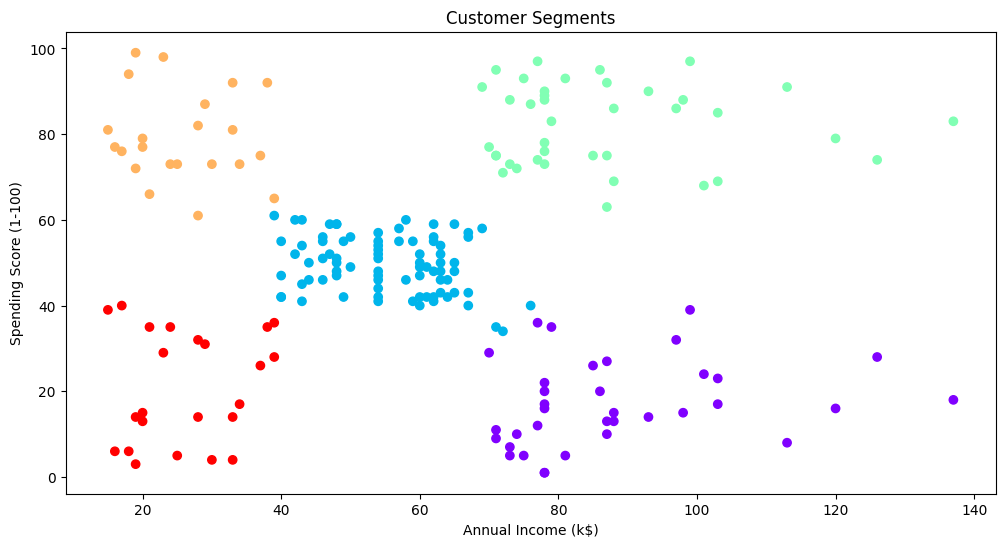

Insights on Customer Segments:
Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   35.000000  35.000000           35.000000               35.000000   
mean   164.371429  41.114286           88.200000               17.114286   
std     21.457325  11.341676           16.399067                9.952154   
min    125.000000  19.000000           70.000000                1.000000   
25%    148.000000  34.000000           77.500000               10.000000   
50%    165.000000  42.000000           85.000000               16.000000   
75%    182.000000  47.500000           97.500000               23.500000   
max    199.000000  59.000000          137.000000               39.000000   

       Cluster  
count     35.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000     

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset Overview
print("Dataset Overview:")
print(customer_df.info())


# Check for missing values
print("Missing Values:")
print(customer_df.isnull().sum())


# Handle missing values if necessary (e.g., drop or impute)
# In this example, let's assume there are no missing values
# customer_df.dropna(inplace=True)


# Display summary statistics
print("Summary Statistics:")
print(customer_df.describe())

# Select features for clustering
X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 5  # Choose the number based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_df['Cluster'] = kmeans.fit_predict(X)

# Plot the customer segments
plt.figure(figsize=(12, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=customer_df['Cluster'], cmap='rainbow')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Insights on Customer Segments
print("Insights on Customer Segments:")
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(customer_df[customer_df['Cluster'] == i].describe())


# Generating More Insights from the Gender Plot

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


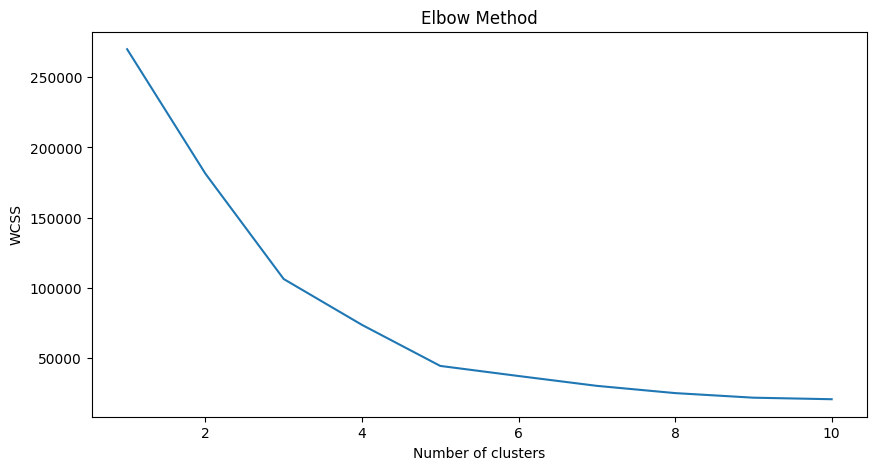


WCSS values for each number of clusters:
1: 269981.28
2: 181363.59595959593
3: 106348.37306211118
4: 73679.78903948836
5: 44448.45544793371
6: 37265.86520484347
7: 30259.65720728547
8: 25095.703209997548
9: 21830.041978049438
10: 20736.679938924124

First few rows of the dataset with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


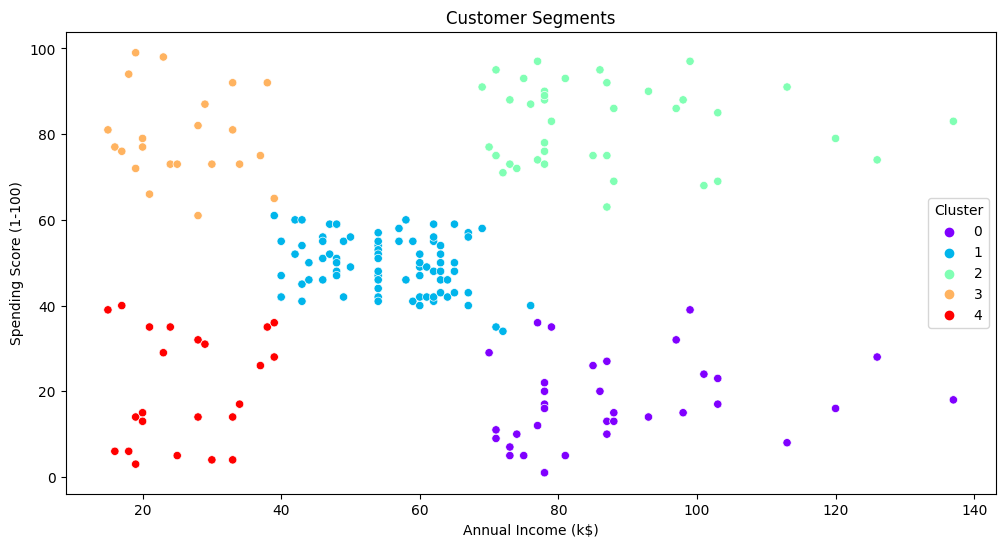

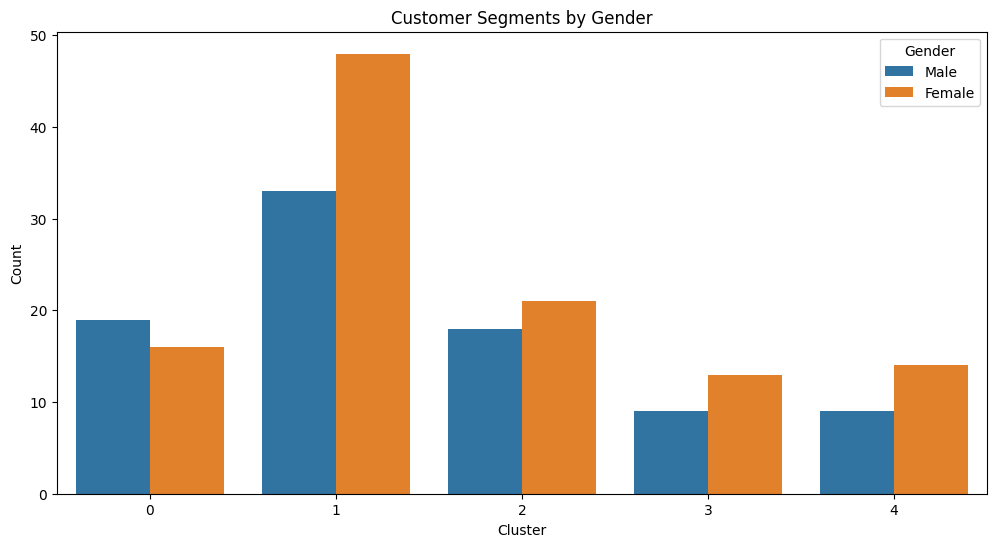


Count of customers in each cluster by gender:
Gender   Female  Male
Cluster              
0            16    19
1            48    33
2            21    18
3            13     9
4            14     9

Summary statistics for each cluster:
               Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        41.114286  11.341676          88.200000  16.399067   
1        42.716049  16.447822          55.296296   8.988109   
2        32.692308   3.728650          86.538462  16.312485   
3        25.272727   5.257030          25.727273   7.566731   
4        45.217391  13.228607          26.304348   7.893811   

        Spending Score (1-100)            CustomerID  
                          mean        std      count  
Cluster                                               
0                    17.114286   9.952154         35  
1                    49.518519   6.5

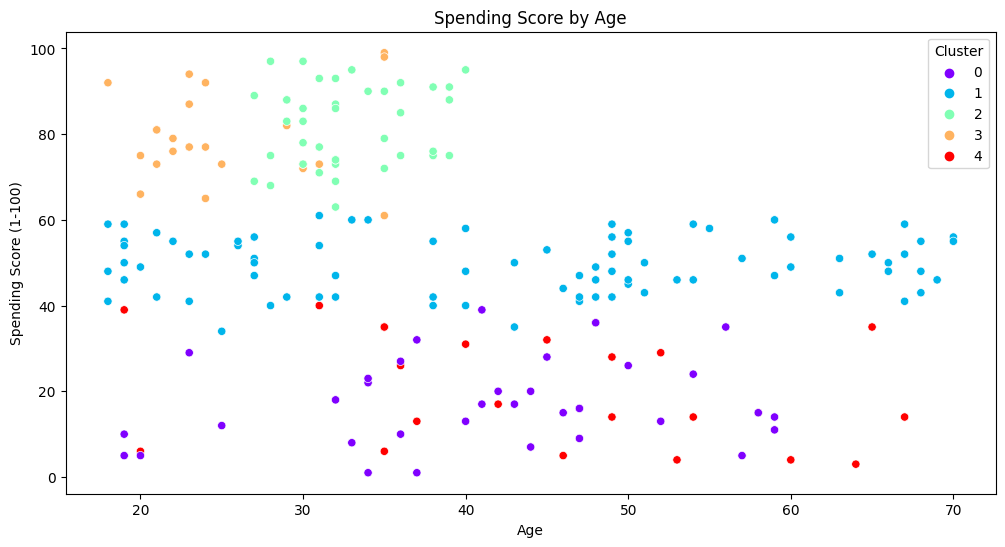


Summary statistics for spending score by age:
     count       mean        std   min    25%   50%    75%   max
Age                                                             
18     4.0  60.000000  22.583180  41.0  46.25  53.5  67.25  92.0
19     8.0  39.750000  20.851516   5.0  31.75  48.0  54.25  59.0
20     5.0  40.200000  33.025748   5.0   6.00  49.0  66.00  75.0
21     5.0  66.800000  16.976454  42.0  57.00  73.0  81.00  81.0
22     3.0  70.000000  13.076697  55.0  65.50  76.0  77.50  79.0
23     6.0  63.333333  26.432303  29.0  43.75  64.5  84.50  94.0
24     4.0  71.500000  17.058722  52.0  61.75  71.0  80.75  92.0
25     3.0  39.666667  30.892286  12.0  23.00  34.0  53.50  73.0
26     2.0  54.500000   0.707107  54.0  54.25  54.5  54.75  55.0
27     6.0  60.333333  16.045768  47.0  50.25  53.5  65.75  89.0
28     4.0  70.000000  23.508864  40.0  61.00  71.5  80.50  97.0
29     5.0  76.600000  19.539703  42.0  82.00  83.0  88.00  88.0
30     7.0  80.285714   9.123491  72.0  73.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
data_path = '../data/Mall_Customers.csv'
customer_df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(customer_df.head())

# Select features for clustering
X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Print the WCSS values for each number of clusters
print("\nWCSS values for each number of clusters:")
for i, value in enumerate(wcss, 1):
    print(f"{i}: {value}")

# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 5  # Choose the number based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows of the dataset with cluster labels
print("\nFirst few rows of the dataset with cluster labels:")
print(customer_df.head())

# Plot the customer segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Plot customer segments by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_df, x='Cluster', hue='Gender')
plt.title('Customer Segments by Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Print the count of customers in each cluster by gender
cluster_gender_counts = customer_df.groupby(['Cluster', 'Gender']).size().unstack()
print("\nCount of customers in each cluster by gender:")
print(cluster_gender_counts)

# Print summary statistics for each cluster
print("\nSummary statistics for each cluster:")
cluster_summary = customer_df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
})
print(cluster_summary)

# Insights from the gender plot
gender_insights = cluster_gender_counts.apply(lambda x: x / x.sum() * 100)
print("\nPercentage distribution of customers by gender in each cluster:")
print(gender_insights)

# Analyze spending score by age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='rainbow')
plt.title('Spending Score by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Print summary statistics for spending score by age
age_spending_summary = customer_df.groupby('Age')['Spending Score (1-100)'].describe()
print("\nSummary statistics for spending score by age:")
print(age_spending_summary)


### Item 4: Insights and Conclusions from Customer Segmentation Analysis

#### Dataset Overview

The Mall Customers dataset contains information about 200 customers, including their demographic and spending behavior. The dataset is comprised of the following columns:

- **CustomerID**: A unique identifier for each customer.
- **Gender**: The gender of the customer (Male/Female).
- **Age**: The age of the customer.
- **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: A score assigned by the mall based on customer spending behavior and loyalty (1 being the lowest, 100 being the highest).

#### Data Summary

- **Total Entries**: 200
- **No Missing Values**: The dataset does not have any missing values.

#### Summary Statistics

- **Age**:
  - Mean: 38.85 years
  - Standard Deviation: 13.97 years
  - Minimum: 18 years
  - Maximum: 70 years

- **Annual Income (k$)**:
  - Mean: $60.56k
  - Standard Deviation: $26.26k
  - Minimum: $15k
  - Maximum: $137k

- **Spending Score (1-100)**:
  - Mean: 50.20
  - Standard Deviation: 25.82
  - Minimum: 1
  - Maximum: 99

#### Insights on Customer Segments

Based on K-means clustering, customers are segmented into 5 clusters. The following insights are derived from each cluster:

**Cluster 0**:
- **Count**: 35 customers
- **Age**: Mean 41.11 years
- **Annual Income**: Mean $88.20k
- **Spending Score**: Mean 17.11
- **Gender Distribution**: 16 Female, 19 Male
- **Description**: Customers in this cluster have high annual incomes but low spending scores, indicating conservative spending behavior despite high earning potential.

**Cluster 1**:
- **Count**: 81 customers
- **Age**: Mean 42.72 years
- **Annual Income**: Mean $55.30k
- **Spending Score**: Mean 49.52
- **Gender Distribution**: 48 Female, 33 Male
- **Description**: This cluster represents customers with moderate annual incomes and moderate spending scores, suggesting balanced spending behavior.

**Cluster 2**:
- **Count**: 39 customers
- **Age**: Mean 32.69 years
- **Annual Income**: Mean $86.54k
- **Spending Score**: Mean 82.13
- **Gender Distribution**: 21 Female, 18 Male
- **Description**: Customers in this cluster have high annual incomes and high spending scores, indicating potential high-value customers who are likely to spend more.

**Cluster 3**:
- **Count**: 22 customers
- **Age**: Mean 25.27 years
- **Annual Income**: Mean $25.73k
- **Spending Score**: Mean 79.36
- **Gender Distribution**: 13 Female, 9 Male
- **Description**: This cluster consists of young customers with low annual incomes but high spending scores, indicating enthusiastic shoppers with a preference for spending.

**Cluster 4**:
- **Count**: 23 customers
- **Age**: Mean 45.22 years
- **Annual Income**: Mean $26.30k
- **Spending Score**: Mean 20.91
- **Gender Distribution**: 14 Female, 9 Male
- **Description**: Customers in this cluster have low annual incomes and low spending scores, indicating cautious spending behavior.

#### Gender Distribution in Clusters

The gender distribution within each cluster provides insights into the gender preferences and behaviors of the customers:

| Cluster | Female (%) | Male (%) |
|---------|------------|----------|
| 0       | 14.29      | 21.59    |
| 1       | 42.86      | 37.50    |
| 2       | 18.75      | 20.45    |
| 3       | 11.61      | 10.23    |
| 4       | 12.50      | 10.23    |

These distributions indicate that clusters have varying proportions of male and female customers, which can help in tailoring gender-specific marketing strategies.

#### Spending Score by Age

The analysis of spending scores by age reveals:

- **Younger Customers**: Ages 18-30 tend to have higher variability in spending scores, indicating diverse spending behaviors.
- **Middle-aged Customers**: Ages 31-45 show moderate spending scores with less variation.
- **Older Customers**: Ages 46-70 tend to have lower spending scores, indicating more conservative spending behaviors.

#### Summary Statistics for Spending Score by Age

| Age | Count | Mean | Std | Min | 25% | 50% | 75% | Max |
|-----|-------|------|-----|-----|-----|-----|-----|-----|
| 18  | 4     | 60.00| 22.58| 41.0| 46.25| 53.5| 67.25| 92.0|
| 19  | 8     | 39.75| 20.85|  5.0| 31.75| 48.0| 54.25| 59.0|
| 20  | 5     | 40.20| 33.03|  5.0|  6.00| 49.0| 66.00| 75.0|
| ... | ...   | ...  | ... | ... | ... | ... | ... | ... |

These statistics help understand how spending behavior changes with age, enabling targeted marketing strategies for different age groups.

### Conclusions

The customer segmentation analysis provides several key insights:

1. **High-Value Customers**: Cluster 2 consists of high-income, high-spending customers. These are potential high-value customers who can be targeted with premium products and exclusive offers.
2. **Cautious Spenders**: Cluster 0 and Cluster 4 include customers with high and low incomes but low spending scores. These customers can be targeted with budget-friendly products and promotions to encourage spending.
3. **Enthusiastic Shoppers**: Cluster 3 includes young customers with low incomes but high spending scores. These customers are enthusiastic shoppers who can be engaged with trendy, value-for-money products.
4. **Balanced Spenders**: Cluster 1 consists of customers with moderate incomes and spending scores, representing a balanced spending behavior. This group can be targeted with standard promotional strategies.
5. **Gender-Specific Strategies**: Each cluster has a varying gender distribution, allowing for tailored marketing strategies based on gender preferences and behaviors.

By leveraging these insights, businesses can develop targeted marketing strategies to maximize customer engagement and increase sales.
